-- Exploratory data analysis-- 

    Analiza el conjunto de datos con el objetivo de resumir sus características principales, generalmente a través de medios visuales. 
    La finalidad es ver que pueden decirnos los datos más alla del modelado formal o las pruebas de hipótesis
    

Fuente: https://en.wikipedia.org/wiki/Exploratory_data_analysis

Data Mining de la muestra extraida de Twitter. Es muy probable que con el paso del tiempo debido a la ampliación de necesidades se incremente la muestra. 

Al obtener el dataset ya se hicieron algunos pasos de data mining como: 

* Supresión de cuentas a las que hace referencia (@XXXX) y aglutinación de múltiples espacios en uno
* Eliminación de páginas web (http,https y www) (str.replace('http\S+|www.\S+', '', case=False))
* Eliminación del símbolo # que hace referencia a los hastag
* Supresión de comentarios duplicados una vez que se elimina todo lo anterior

Este dataset contiene lenguaje tóxico que es el que se está analizando. 

In [207]:
import pandas as pd
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
import numpy as np
from emoji import UNICODE_EMOJI

%matplotlib inline

# Lectura de la muestra

In [164]:
df = pd.read_csv("C:/Users/Esperanza/Desktop/UOC/TFM/python/insultos.csv", sep=';',usecols=[0,1])
df.iloc[264,:]

texto     _efs Juego sucio no, barriobajero.
toxico                                     1
Name: 264, dtype: object

# Data Cleaning 

**1) Eliminación de todas las palabras que empiecen por '_' ya que no nos dan información. **

*_Zaragoza_ Cállese burro, lea libros y tuitee menos, botarate. ;1;*

In [165]:
#Función que elimina la palabra que empiece por el caracter (char) en el texto(text)
def delete_starting_with(text, char):
    text=' '.join(word for word in text.split(' ') if not word.startswith(char))
    return text

In [166]:
df['texto']=df['texto'].apply(lambda txt: delete_starting_with(txt, '_') )
df['texto']=df['texto'].replace('_','')
df.iloc[264,:]

texto     Juego sucio no, barriobajero.
toxico                                1
Name: 264, dtype: object

**2) Eliminación de las comillas. **

*"""Tú eres tan cabrón que los estás jodiendo"" ""Que pongan el aire más alto así nos infectamos"" ""Estos hijos de puta se tienen que ir a su país"" ""Que esto es España joder"" ""Dentro de poco esto va a estar lleno de ratas y nos vamos a infectar todos"" ""Me están tocando los huevos"""*

In [167]:
df.iloc[2,:]

texto     "Tú eres tan cabrón que los estás jodiendo" "Q...
toxico                                                    1
Name: 2, dtype: object

In [168]:
df['texto']=df.texto.apply(lambda x: x.replace('\"',''))
df.iloc[2,:]

texto     Tú eres tan cabrón que los estás jodiendo Que ...
toxico                                                    1
Name: 2, dtype: object

# Análisis

** Descripción general del dataset**

In [169]:
#Dimensiones del corpus obtenido de Twitter sobre lenguaje tóxico
print("Número de filas : "+str(df.shape[0]))
print("Número de columnas : "+str(df.shape[1]))

Número de filas : 439
Número de columnas : 2


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 2 columns):
texto     439 non-null object
toxico    439 non-null int64
dtypes: int64(1), object(1)
memory usage: 6.9+ KB


Donde se puede ver que no hay ningún valor a nulo. gracias a reconocerlos con: 

In [171]:
df[df.isnull().any(axis=1)].head()

,texto,toxico


** Cuenta del número de signos de admiración en mayúsculas como signo de exaltación. **

*ENTRETÉNME, PAYASO!!!... *

In [172]:
#Creación de la columna que cuenta el número de veces que aparece un símbolo
df['num_admir']=df.texto.apply(lambda txt: txt.count('!') )

In [173]:
df.iloc[194,:]

texto        ENTRETÉNME, PAYASO!!!... 
toxico                               1
num_admir                            3
Name: 194, dtype: object

**Cuenta del número de palabras en mayúsculas como signo de exaltación. **

*ENTRETÉNME, PAYASO!!!... *

In [174]:
regex = r"\B[A-Z]+\b"
frase = "Que Valls será un mierdaseca, que nadie lo discute, pero que está ofreciendo sus votos GRATIS CHABALADA. No he visto todavía a la derecha catalana hacer lo mismo"

In [175]:
#Búsqueda las palabras en mayúsculas a través de una expresión regular
df['num_may']=df.texto.apply(lambda txt: len(list(re.finditer(regex, txt))) )
#matches = list(re.finditer(regex, frase))
#type(matches)
df.iloc[194,:]

texto        ENTRETÉNME, PAYASO!!!... 
toxico                               1
num_admir                            3
num_may                              2
Name: 194, dtype: object

**Tokenización de los textos. **

In [176]:
series_token=df.texto.apply(lambda txt: print(word_tokenize(txt)))


['Que', 'asco', 'de', 'cabrón', '.']
['Felipe', '.', 'Cállate', ',', 'cabrón', '.', '¿Con', 'qué', 'cara', 'te', 'atreves', 'a', 'hablar', 'sobre', 'construcción', 'de', 'refinerías', '?']
['Tú', 'eres', 'tan', 'cabrón', 'que', 'los', 'estás', 'jodiendo', 'Que', 'pongan', 'el', 'aire', 'más', 'alto', 'así', 'nos', 'infectamos', 'Estos', 'hijos', 'de', 'puta', 'se', 'tienen', 'que', 'ir', 'a', 'su', 'país', 'Que', 'esto', 'es', 'España', 'joder', 'Dentro', 'de', 'poco', 'esto', 'va', 'a', 'estar', 'lleno', 'de', 'ratas', 'y', 'nos', 'vamos', 'a', 'infectar', 'todos', 'Me', 'están', 'tocando', 'los', 'huevos']
['Jajajajaja', 'Qué', 'cabrón']
['Ja', 'ja', ',', 'cabrón', '😅']
['HIJO', 'DE', 'PUTA', ',', 'COMO', 'TE', 'ATREVES', 'A', 'PONER', 'ESE', 'EMOJI']
['Cínico', 'hijo', 'de', 'la', 'gran', 'puta', '.']
['Mis', 'padres', 'estaban', 'buscando', 'casa', 'y', 'llamo', 'el', 'vendedor', 'de', 'la', 'casa', '.', 'Yo', 'cogí', 'el', 'teléfono', 'y', 'empecé', 'a', 'insultarte', '(', 'gilipo

In [177]:
df_token = pd.DataFrame([series_token.rename(None)])
df.tail()

,texto,toxico,num_admir,num_may
434,Natación en piscina olímpica. 👌👏🏊‍♂️,0,0,0
435,Nuestro equipo de sincronizada en el Campeonat...,0,0,0
436,Muchas felicidades al son Campeones de España ...,0,0,0
437,No hay tiempo para estar triste,0,0,0
438,Jugamos con uno menos el primer tiempo,0,0,0


** Cuenta del número de emoticonos . **


In [209]:
def is_emoji(s):
    count = 0
    for emoji in UNICODE_EMOJI:
        count += s.count(emoji)
        if count > 1:
            return False
    return bool(count)

In [210]:
def num_emoji(texto):
    num=0
    lista=texto.split(' ')
    for word in lista: 
        if(is_emoji(word)):
            num=num+1
    return num

In [211]:
df['num_emoji']=df['texto'].apply(lambda txt: num_emoji(txt))

In [212]:
df[df.num_emoji == 2]

,texto,toxico,num_admir,num_may,num_emoji
273,Receta de tortilla de atún y tomate 🍰 REGÁLANO...,0,0,3,2
334,📲:Supuse que sabía... Pero la playa no me suen...,0,0,0,2
426,¿Preparad@ para la marcha senderista Nocturna ...,0,0,0,2


In [218]:
import emoji
def extract_emojis(str):
  return ''.join(c for c in str if c in emoji.UNICODE_EMOJI)

In [219]:
df['emojis']=df['texto'].apply(lambda txt: extract_emojis(txt))

In [233]:
df['emojis'].iloc[27]

'🤣🐷🤣🐷🤣🐷🤣🐷🤣🐷🤣🐷🤣'

In [234]:
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])

In [235]:
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

In [237]:
#Emoji patterns
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)
emoji_pattern

re.compile(r'[😀-🙏🌀-🗿🚀-\U0001f6ff\U0001f1e0-🇿✂-➰Ⓜ-🉑]+', re.UNICODE)

**Representación de las categorías **

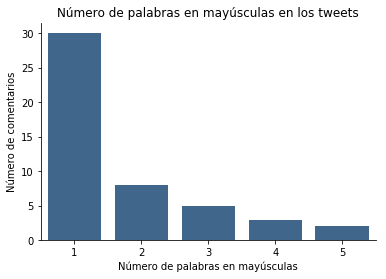

In [178]:
#Representación del número de palabras en mayúsuclas
#Se elimina el 0 por no ser siginificativo
dy = sns.countplot(data=df, x='num_may',color=(0.2, 0.4, 0.6),order = list(range(df.num_may.min()+1,6)))
dy.set(xlabel='Número de palabras en mayúsculas', ylabel = 'Número de comentarios')
dy.spines['top'].set_color('none')
dy.spines['right'].set_color('none')
plt.title('Número de palabras en mayúsculas en los tweets')
plt.show()

In [ ]:
#Representación del número de palabras en mayúsuclas
#Se elimina el 0 por no ser siginificativo
dy = sns.countplot(data=df, x='num_admir',color=(0.2, 0.4, 0.6),order = list(range(df.num_admir.min()+1,6)))
dy.set(xlabel='Número de signos de admiración', ylabel = 'Número de comentarios')
dy.spines['top'].set_color('none')
dy.spines['right'].set_color('none')
plt.title('Número de signos !')
plt.show()

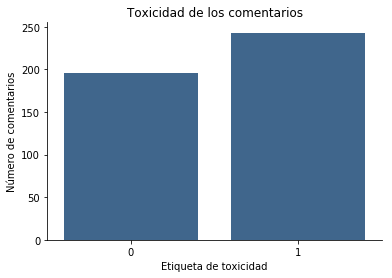

In [179]:
#Representación del número de palabras etiquetadas como tóxicas
dy = sns.countplot(data=df, x='toxico',color=(0.2, 0.4, 0.6))
dy.set(xlabel='Etiqueta de toxicidad', ylabel = 'Número de comentarios')
dy.spines['top'].set_color('none')
dy.spines['right'].set_color('none')
plt.title('Toxicidad de los comentarios')
plt.show()

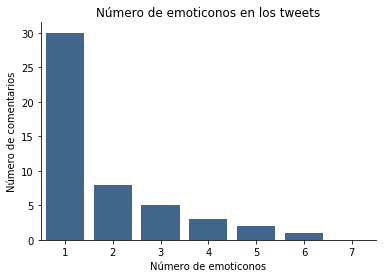

In [232]:
#Representación del número de palabras en mayúsuclas
#Se elimina el 0 por no ser siginificativo
dy = sns.countplot(data=df, x='num_may',color=(0.2, 0.4, 0.6),order = list(range(df.num_emoji.min()+1,8)))
dy.set(xlabel='Número de emoticonos', ylabel = 'Número de comentarios')
dy.spines['top'].set_color('none')
dy.spines['right'].set_color('none')
plt.title('Número de emoticonos en los tweets')
plt.show()

# Wordcloud

In [180]:
dfwc=df2
forb=stopwords.words('spanish')
forb.append("si")
forb.append("va")
forb.append("el")
forb.append("pp")
forb.append("besugo")
type(forb)

list

In [181]:
#Supresión de las stopword en castellano
dfwc['filtered_words']=dfwc.texto.apply(lambda frase: [word.lower() for word in frase.split(' ') if word.lower() not in forb])
#Separación del dataframe en dataframe con lenguaje tóxico y dataframe sin lenguaje tóxico
df_pos=dfwc[dfwc.toxico == 0]
df_neg=dfwc[dfwc.toxico == 1]
#Conversión de la lista de listas a una sola lista con todas las palabras
slist_pos = [st for row in df_pos.filtered_words for st in row]
slist_neg = [st for row in df_neg.filtered_words for st in row]

In [182]:
neg_string = ' '.join(slist_neg)
pos_string = ' '.join(slist_pos)

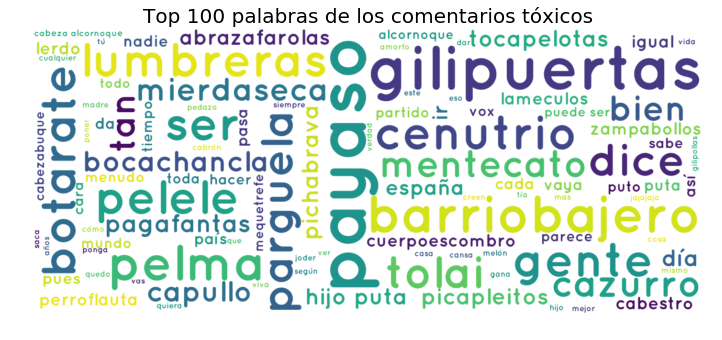

In [185]:
wordcloud = WordCloud(width=1400, height=600, max_words=100, \
                      max_font_size=150,\
                      background_color="white",\
                      font_path='C:/Users/Esperanza/Desktop/UOC/TFM/python/Quicksand-Bold.otf').generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Top 100 palabras de los comentarios tóxicos', fontsize=20)
plt.show()

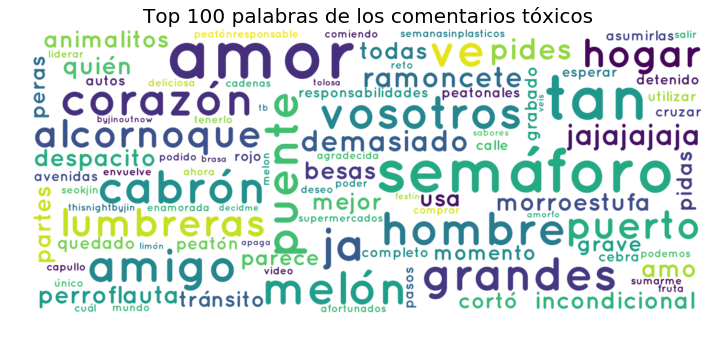

In [187]:
wordcloud = WordCloud(width=1400, height=600, max_words=100, \
                      max_font_size=150,\
                      background_color="white",\
                      font_path='C:/Users/Esperanza/Desktop/UOC/TFM/python/Quicksand-Bold.otf').generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Top 100 palabras de los comentarios tóxicos', fontsize=20)

plt.show()

# Wordcloud

Da una idea generak sobre cuales son las palabras que tienen mas presencia en nuestro corpus. 

In [213]:
def is_emoji(s):
    count = 0
    for emoji in UNICODE_EMOJI:
        count += s.count(emoji)
        print(count)
        if count > 1:
            return False
    return bool(count)

In [214]:
frase="Receta de tortilla de atún y tomate 🍰 REGÁLANO."

In [215]:
is_emoji(frase)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


True

True

,texto,toxico,num_admir,num_may,num_emoji
273,Receta de tortilla de atún y tomate 🍰 REGÁLANO...,0,0,3,2
334,📲:Supuse que sabía... Pero la playa no me suen...,0,0,0,2
426,¿Preparad@ para la marcha senderista Nocturna ...,0,0,0,2
